In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize

In [34]:
#####3
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#input_path = "/content/drive/MyDrive/DeepLearning Project"
input_path = "/content/drive/MyDrive/ColabNote/new_DL/new DL"
categories = ['strawberry' , 'guava' , 'banana' , 'apple']
data = []
labels = []
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_path , category)):
    img_path = os.path.join(input_path , category , file)
    print(img_path)
    img = imread(img_path)
   # img = resize(img , (32,32))
    img = resize(img , (224,224))
    data.append(img.flatten())
    labels.append(category_idx)


/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (1).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (170).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (177).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (193).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (194).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (195).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (175).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (182).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (185).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (48).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStrawberry (28).jpg
/content/drive/MyDrive/ColabNote/new_DL/new DL/strawberry/RottenStraw

In [6]:
data[1]

array([0.86906104, 0.86906104, 0.8612179 , ..., 0.71808345, 0.70631874,
       0.6867109 ])

In [7]:
labels[1]

0

###matrix to numpy array

In [8]:
data = np.asanyarray(data)
labels = np.asanyarray(labels)

In [9]:
data

array([[0.88471935, 0.88471935, 0.87687622, ..., 0.77049428, 0.76071497,
        0.74698128],
       [0.86906104, 0.86906104, 0.8612179 , ..., 0.71808345, 0.70631874,
        0.6867109 ],
       [0.85492499, 0.85100336, 0.83927045, ..., 0.71456615, 0.6949627 ,
        0.69329732],
       ...,
       [0.99902543, 0.99902543, 0.99902543, ..., 0.91959928, 0.93777735,
        0.9620163 ],
       [0.84515091, 0.841276  , 0.86074387, ..., 0.99916841, 0.99916841,
        0.99916841],
       [0.84333301, 0.8354904 , 0.8394117 , ..., 0.9799761 , 0.98389767,
        0.99149286]])

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

###split data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size = 0.2 , shuffle = True , stratify = labels)

###model

In [13]:
from sklearn.svm import SVC
svm_model = SVC()

In [14]:
svm_model.fit(x_train , y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)

###evaluation

In [25]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test , y_pred)
print("Accuracy:", score)

Accuracy: 0.2625


In [26]:
train_datagen = x_train , x_test , y_train , y_test = train_test_split(data , labels , test_size = 0.2 , shuffle = True , stratify = labels)


In [27]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [ ]:
x =[]
y=[]
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_path , category)):
    img_path = os.path.join(input_path , category , file)
    print(img_path)
    img = imread(img_path)
   # img = resize(img , (32,32))
    img = resize(img , (224,224))
    data.append(img.flatten())
    labels.append(category_idx)

In [91]:
x =[]
y=[]
for category_idx , category in enumerate(categories):
  for file in os.listdir(os.path.join(input_path , category)):
      img = cv2.imread(os.path.join(input_path , category , file))
      img = cv2.resize(img , (299,299))
      x.append(img)
      y.append(category_idx)

array([[[245, 221, 199],
        [244, 220, 198],
        [245, 221, 197],
        ...,
        [254, 244, 218],
        [255, 244, 221],
        [255, 244, 220]],

       [[248, 224, 202],
        [246, 219, 198],
        [244, 220, 198],
        ...,
        [255, 250, 223],
        [255, 246, 222],
        [255, 247, 220]],

       [[245, 220, 200],
        [244, 219, 199],
        [248, 224, 202],
        ...,
        [255, 246, 219],
        [255, 245, 219],
        [255, 244, 217]],

       ...,

       [[255, 255, 231],
        [255, 255, 230],
        [255, 255, 227],
        ...,
        [255, 255, 245],
        [255, 255, 243],
        [255, 255, 244]],

       [[255, 255, 230],
        [255, 255, 230],
        [254, 254, 224],
        ...,
        [255, 255, 242],
        [252, 253, 238],
        [255, 254, 240]],

       [[254, 253, 225],
        [255, 255, 227],
        [254, 253, 227],
        ...,
        [255, 255, 241],
        [255, 255, 241],
        [255, 255, 242]]], dtype=uint8)
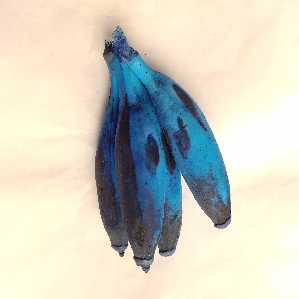

In [93]:
x[400]

In [88]:
y[1]

3

In [94]:
#inception v3 from yt girl
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , shuffle = True , stratify = y)
print("Shape of image in x train",x_train[0].shape)
print("Shape of image in x test",x_test[0].shape)

Shape of image in x train (299, 299, 3)
Shape of image in x test (299, 299, 3)


In [95]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=5)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=5)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = np.array(x_train)
x_test = np.array(x_test)

In [96]:
print("x_train shape:" , x_train.shape)
print("y_train shape:" , y_train.shape)
print("x_test shape:" , x_test.shape)
print("y_test shape:" , y_test.shape)

x_train shape: (536, 299, 299, 3)
y_train shape: (536, 5)
x_test shape: (264, 299, 299, 3)
y_test shape: (264, 5)


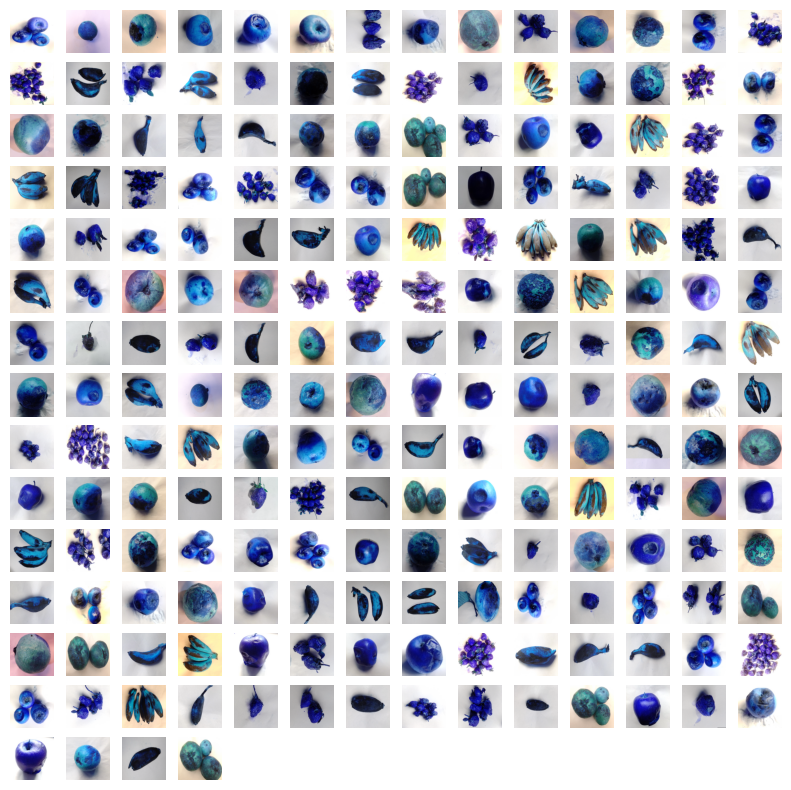

In [100]:
#%mathplotlib inline
plt.figure(figsize=(10,10))
for i in range(200):
    plt.subplot(15,14,i+1)
    plt.imshow(x_train[i],cmap = "gray")
    plt.axis("off")
plt.show()

In [101]:
from keras.applications.inception_v3 import InceptionV3
img_rows = 299
img_cols = 299

inceprionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))
#freeze last 4 layers
for layer in inceprionv3.layers:
    layer.trainable = False
#Print layer
for (i,layer) in enumerate(inceprionv3.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44 Conv2D False
45 Conv2D False
46 BatchNormalization False
47 Batc

In [102]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D,Convolution2D
from keras.layers  import BatchNormalization
from keras.models import Model

In [103]:
from ast import Global
def xd(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(600, activation = "relu")(top_model)
    top_model = Dense(400, activation = "relu")(top_model)
    top_model = Dense(128, activation = "relu")(top_model)
    top_model = Dense(num_classes, activation = "softmax")(top_model)
    return top_model

In [104]:
num_classes = 5
FC_Head = xd(inceprionv3, num_classes)
model = Model(inputs = inceprionv3.input, outputs = FC_Head)
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_376 (Conv2D)       │ (None, 149, 149, 32)   │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_376   │ (None, 149, 149, 32)   │             96 │ conv2d_376[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_376            │ (None, 149, 149, 32)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_377 (Conv2D)       │ (None, 147, 147, 32)   │          9,216 │ activation_376[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_377   │ (None, 147, 147, 32)   │             96 │ conv2d_377[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_377            │ (None, 147, 147, 32)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_378 (Conv2D)       │ (None, 147, 147, 64)   │         18,432 │ activation_377[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_378   │ (None, 147, 147, 64)   │            192 │ conv2d_378[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_378            │ (None, 147, 147, 64)   │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 73, 73, 64)     │              0 │ activation_378[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_379 (Conv2D)       │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_379   │ (None, 73, 73, 80)     │            240 │ conv2d_379[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_379            │ (None, 73, 73, 80)     │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_380 (Conv2D)  

 Total params: 23,324,557 (88.98 MB)

 Trainable params: 1,521,773 (5.81 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

None


In [105]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [106]:
history = model.fit(x_train , y_train ,epochs=10, validation_data = (x_test, y_test),verbose = 1,initial_epoch=0)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 217s 12s/step - accuracy: 0.2370 - loss: 27.9053 - val_accuracy: 0.4697 - val_loss: 2.4638
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 203s 12s/step - accuracy: 0.4853 - loss: 1.9976 - val_accuracy: 0.4735 - val_loss: 2.0950
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 262s 12s/step - accuracy: 0.4438 - loss: 2.2304 - val_accuracy: 0.6742 - val_loss: 1.4384
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 266s 12s/step - accuracy: 0.6713 - loss: 1.2768 - val_accuracy: 0.7538 - val_loss: 0.6715
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 208s 12s/step - accuracy: 0.6824 - loss: 0.9945 - val_accuracy: 0.7045 - val_loss: 0.9350
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 239s 11s/step - accuracy: 0.7221 - loss: 0.8100 - val_accuracy: 0.5985 - val_loss: 1.4674
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 185s 11s/step - accuracy: 0.7233 - loss: 0.9160 - val_accuracy: 0.6288 - val_loss: 1.2984
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 206s 13s/step - accuracy: 0.7036 - loss: 0.9849 - val_accuracy: 0

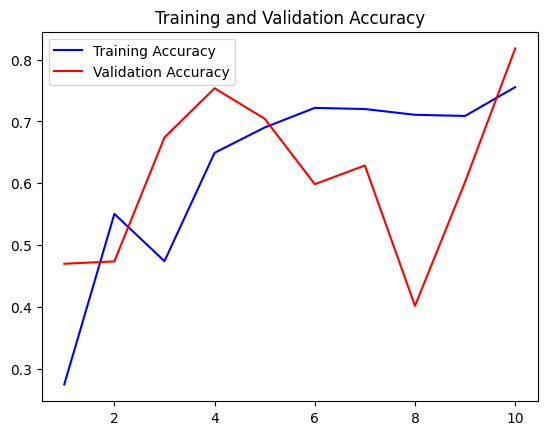

In [107]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

In [108]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.47705456614494324
Test accuracy: 0.8181818127632141
